# Assignment 3 - Text Analysis
An explanation this assignment could be found in the .pdf explanation document


## Materials to review for this assignment
<h4>From Moodle:</h4> 
<h5><u>Review the notebooks regarding the following python topics</u>:</h5>
<div class="alert alert-info">
&#x2714; <b>Working with strings</b> (tutorial notebook)<br/>
&#x2714; <b>Text Analysis</b> (tutorial notebook)<br/>
&#x2714; <b>Hebrew text analysis tools (tokenizer, wordnet)</b> (moodle example)<br/>
&#x2714; <b>(brief review) All previous notebooks</b><br/>
</div> 
<h5><u>Review the presentations regarding the following topics</u>:</h5>
<div class="alert alert-info">
&#x2714; <b>Text Analysis</b> (lecture presentation)<br/>
&#x2714; <b>(brief review) All other presentations</b><br/>
</div>

## Personal Details:

In [3]:
# Details Student 1:
# Sahar Yehezkel Poor
# 318193372
print("Full Name:\nSahar Yehezkel Poor\n\nID:\n318193372\n\n:)")


Full Name:
Sahar Yehezkel Poor

ID:
318193372

:)


## Preceding Step - import modules (packages)
This step is necessary in order to use external modules (packages). <br/>

In [4]:
# --------------------------------------
import pandas as pd
import numpy as np
# --------------------------------------


# --------------------------------------
# ------------- visualizations:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
# --------------------------------------


# ---------------------------------------
import sklearn
from sklearn import preprocessing, metrics, pipeline, model_selection, feature_extraction 
from sklearn import naive_bayes, linear_model, svm, neural_network, neighbors, tree
from sklearn import decomposition, cluster

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV 
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import mean_squared_error, r2_score, silhouette_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder

from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import Perceptron, SGDClassifier
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
# ---------------------------------------


# ----------------- output and visualizations: 
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter("ignore", category=ConvergenceWarning)
# show several prints in one cell. This will allow us to condence every trick in one cell.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# ---------------------------------------

### Text analysis and String manipulation imports:

In [5]:
# --------------------------------------
# --------- Text analysis and Hebrew text analysis imports:
# vectorizers:
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# regular expressions:
import re
# --------------------------------------

### (optional) Hebrew text analysis - WordNet (for Hebrew)
Note: the WordNet is not a must

#### (optional) Only if you didn't install Wordnet (for Hebrew) use:

In [ ]:
# word net installation:

# unmark if you want to use and need to install
!pip install wn
!python -m wn download omw-he:1.4

In [6]:
# word net import:

# unmark if you want to use:
import wn

### (optional) Hebrew text analysis - hebrew_tokenizer (Tokenizer for Hebrew)
Note: the hebrew_tokenizer is not a must

#### (optional) Only if you didn't install hebrew_tokenizer use:

In [6]:
# Hebrew tokenizer installation:

# unmark if you want to use and need to install:
!pip install hebrew_tokenizer

In [7]:
# Hebrew tokenizer import:

# unmark if you want to use:
import hebrew_tokenizer as ht

C:\Users\Moking\Downloads\assignment3-text_analysis\assignment3-text_analysis


### Reading input files
Reading input files for train annotated corpus (raw text data) corpus and for the test corpus

In [18]:
train_filename = 'annotated_corpus_for_train.csv'
test_filename  = 'corpus_for_test.csv'
df_train = pd.read_csv(train_filename, index_col=None, encoding='utf-8')
df_test  = pd.read_csv(test_filename, index_col=None, encoding='utf-8')

In [19]:
df_train.head(8)
df_train.shape

,story,gender
0,"כשחבר הזמין אותי לחול, לא באמת חשבתי שזה יקרה,...",m
1,לפני שהתגייסתי לצבא עשיתי כל מני מיונים ליחידו...,m
2,מאז שהתחילו הלימודים חלומו של כל סטודנט זה הפנ...,f
3,"כשהייתי ילד, מטוסים היה הדבר שהכי ריתק אותי. ב...",m
4,‏הייתי מדריכה בכפר נוער ומתאם הכפר היינו צריכי...,f
5,לפני כ3 חודשים טסתי לרומא למשך שבוע. טסתי במטו...,f
6,אני כבר שנתיים נשוי והשנה אני ואישתי סוף סוף י...,m
7,השנה התחלנו שיפוץ בדירה שלנו בתל אביב. הדירה ה...,f


(753, 2)

In [20]:
df_test.head(3)
df_test.shape

,test_example_id,story
0,0,כל קיץ אני והמשפחה נוסעים לארצות הברית לוס אנג...
1,1,"הגעתי לשירות המדינה אחרי שנתיים כפעיל בתנועת ""..."
2,2,אחת האהבות הגדולות שלי אלו הכלבים שלי ושל אישת...


(323, 2)

### Your implementation:
Write your code solution in the following code-cells

In [21]:
# Lets clean the text... (preprocessing)
# This cell will clean the text by the steps:
# 1. Take every story from all the stories (df['story']) then split every word and charactar to token.
# 2. Hebrew_tokenizer - return the type of the token, the token itself and more few non relevant types.
# 3. We will check for every token if his type is HEBREW and if it is -> join the token for all the current hebrew
#    tokens for the current story.
# 4. We will create a string object of the story by using ( " ".join... ).
# 5. Join the cleaned text story to new list of all_stories (All stories are clean!)
# 6. Replace the feature 'story' with the cleaned text.


all_stories = []
for story in df_train['story']:
    tokens = ht.tokenize(story)
    hebrew_tokens = [token for grp, token, _, _ in tokens if grp == 'HEBREW']
    curr_story = ' '.join(hebrew_tokens)
    all_stories.append(curr_story)

df_train['story'] = all_stories

In [22]:
# Because you don't give us the test answers i need to be creative and find a solution to know if my model is accurate! :D
# Let's split the df for 90% train and 10% test.

X_train, X_test, y_train, y_test = train_test_split(df_train['story'], df_train['gender'], test_size=0.15, random_state=42, shuffle=True)

In [23]:
# This cell do the last proccess and model create & fit.
# I will try both TfidfVectorizer and CountVectorizer.
# I will print the head of the predictions for each vectorizer and the f1-score to compare.
#
# Current Cell Algorithm: KNN (K=4)

TFIDF_Vectorizer = TfidfVectorizer(max_features=1000)
CV_Vectorizer = CountVectorizer(max_features=1000)

X_train_TFIDF = TFIDF_Vectorizer.fit_transform(X_train)
X_test_TFIDF = TFIDF_Vectorizer.transform(X_test)

X_train_CV = CV_Vectorizer.fit_transform(X_train)
X_test_CV = CV_Vectorizer.transform(X_test)

model = KNeighborsClassifier(n_neighbors=5)

#TFIDF
model.fit(X_train_TFIDF, y_train)
y_pred = model.predict(X_test_TFIDF)
df_prediction = pd.DataFrame({"story":X_test, "pred":y_pred, "actual":y_test})
print("\n\n\nTFIDF_Vectorizer + KNN(K=5):")
df_prediction.head()
f1 = f1_score(y_test, y_pred, average='weighted')
print(f'Weighted F1-score for TFIDF_Vectorizer: {f1:.2f}')

#CV
model.fit(X_train_CV, y_train)
y_pred = model.predict(X_test_CV)
df_prediction = pd.DataFrame({"story":X_test, "pred":y_pred, "actual":y_test})
print("\n\n\nCountVectorizer + KNN(K=5):")
df_prediction.head()
f1 = f1_score(y_test, y_pred, average='weighted')
print(f'Weighted F1-score for CountVectorizer: {f1:.2f}')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')




TFIDF_Vectorizer + KNN(K=5):


,story,pred,actual
716,יום אחד במהלך חופשת חנוכה הלכנו כמה חברים לשחק...,m,m
651,לפני כחצי שנה עברתי לגור בצפון עם בת זוגתי עבר...,m,m
371,כשהתחילה הקורונה הלימודים עברו להיות רק בזום כ...,m,f
77,בשנה האחרונה עברתי דירה לעיר שיש בה ים כל חיי ...,m,f
212,לפני חצי שנה הייתי באיטליה עם המשפחה שלי זאת ה...,m,f


Weighted F1-score for TFIDF_Vectorizer: 0.72


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')




CountVectorizer + KNN(K=5):


,story,pred,actual
716,יום אחד במהלך חופשת חנוכה הלכנו כמה חברים לשחק...,m,m
651,לפני כחצי שנה עברתי לגור בצפון עם בת זוגתי עבר...,m,m
371,כשהתחילה הקורונה הלימודים עברו להיות רק בזום כ...,m,f
77,בשנה האחרונה עברתי דירה לעיר שיש בה ים כל חיי ...,m,f
212,לפני חצי שנה הייתי באיטליה עם המשפחה שלי זאת ה...,m,f


Weighted F1-score for CountVectorizer: 0.64


In [24]:
# This cell do the last proccess and model create & fit.
# I will try both TfidfVectorizer and CountVectorizer.
# I will print the head of the predictions for each vectorizer and the f1-score to compare.
#
# Current Cell Algorithm: KNN (K=7)

X_train_TFIDF = TFIDF_Vectorizer.fit_transform(X_train)
X_test_TFIDF = TFIDF_Vectorizer.transform(X_test)

X_train_CV = CV_Vectorizer.fit_transform(X_train)
X_test_CV = CV_Vectorizer.transform(X_test)

model = KNeighborsClassifier(n_neighbors=3)

#TFIDF
model.fit(X_train_TFIDF, y_train)
y_pred = model.predict(X_test_TFIDF)
df_prediction = pd.DataFrame({"story":X_test, "pred":y_pred, "actual":y_test})
print("\n\n\nTFIDF_Vectorizer + KNN(K=3):")
df_prediction.head()
f1 = f1_score(y_test, y_pred, average='weighted')
print(f'Weighted F1-score for TFIDF_Vectorizer: {f1:.2f}')

#CV
model.fit(X_train_CV, y_train)
y_pred = model.predict(X_test_CV)
df_prediction = pd.DataFrame({"story":X_test, "pred":y_pred, "actual":y_test})
print("\n\n\nCountVectorizer + KNN(K=3):")
df_prediction.head()
f1 = f1_score(y_test, y_pred, average='weighted')
print(f'Weighted F1-score for CountVectorizer: {f1:.2f}')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')




TFIDF_Vectorizer + KNN(K=3):


,story,pred,actual
716,יום אחד במהלך חופשת חנוכה הלכנו כמה חברים לשחק...,m,m
651,לפני כחצי שנה עברתי לגור בצפון עם בת זוגתי עבר...,m,m
371,כשהתחילה הקורונה הלימודים עברו להיות רק בזום כ...,m,f
77,בשנה האחרונה עברתי דירה לעיר שיש בה ים כל חיי ...,m,f
212,לפני חצי שנה הייתי באיטליה עם המשפחה שלי זאת ה...,m,f


Weighted F1-score for TFIDF_Vectorizer: 0.69


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')




CountVectorizer + KNN(K=3):


,story,pred,actual
716,יום אחד במהלך חופשת חנוכה הלכנו כמה חברים לשחק...,m,m
651,לפני כחצי שנה עברתי לגור בצפון עם בת זוגתי עבר...,m,m
371,כשהתחילה הקורונה הלימודים עברו להיות רק בזום כ...,m,f
77,בשנה האחרונה עברתי דירה לעיר שיש בה ים כל חיי ...,m,f
212,לפני חצי שנה הייתי באיטליה עם המשפחה שלי זאת ה...,m,f


Weighted F1-score for CountVectorizer: 0.65


In [25]:
# This cell do the last proccess and model create & fit.
# I will try both TfidfVectorizer and CountVectorizer.
# I will print the head of the predictions for each vectorizer and the f1-score to compare.
#
# Current Cell Algorithm: Perceptron

X_train_TFIDF = TFIDF_Vectorizer.fit_transform(X_train)
X_test_TFIDF = TFIDF_Vectorizer.transform(X_test)

X_train_CV = CV_Vectorizer.fit_transform(X_train)
X_test_CV = CV_Vectorizer.transform(X_test)

model = Perceptron()

#TFIDF
model.fit(X_train_TFIDF, y_train)
y_pred = model.predict(X_test_TFIDF)
df_prediction = pd.DataFrame({"story":X_test, "pred":y_pred, "actual":y_test})
print("\n\n\nTFIDF_Vectorizer + Perceptron:")
df_prediction.head()
f1 = f1_score(y_test, y_pred, average='weighted')
print(f'Weighted F1-score for TFIDF_Vectorizer: {f1:.2f}')

#CV
model.fit(X_train_CV, y_train)
y_pred = model.predict(X_test_CV)
df_prediction = pd.DataFrame({"story":X_test, "pred":y_pred, "actual":y_test})
print("\n\n\nCountVectorizer + Perceptron:")
df_prediction.head()
f1 = f1_score(y_test, y_pred, average='weighted')
print(f'Weighted F1-score for CountVectorizer: {f1:.2f}')

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)




TFIDF_Vectorizer + Perceptron:


,story,pred,actual
716,יום אחד במהלך חופשת חנוכה הלכנו כמה חברים לשחק...,m,m
651,לפני כחצי שנה עברתי לגור בצפון עם בת זוגתי עבר...,m,m
371,כשהתחילה הקורונה הלימודים עברו להיות רק בזום כ...,m,f
77,בשנה האחרונה עברתי דירה לעיר שיש בה ים כל חיי ...,m,f
212,לפני חצי שנה הייתי באיטליה עם המשפחה שלי זאת ה...,f,f


Weighted F1-score for TFIDF_Vectorizer: 0.78


Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)




CountVectorizer + Perceptron:


,story,pred,actual
716,יום אחד במהלך חופשת חנוכה הלכנו כמה חברים לשחק...,m,m
651,לפני כחצי שנה עברתי לגור בצפון עם בת זוגתי עבר...,m,m
371,כשהתחילה הקורונה הלימודים עברו להיות רק בזום כ...,m,f
77,בשנה האחרונה עברתי דירה לעיר שיש בה ים כל חיי ...,f,f
212,לפני חצי שנה הייתי באיטליה עם המשפחה שלי זאת ה...,f,f


Weighted F1-score for CountVectorizer: 0.72


In [26]:
# This cell do the last proccess and model create & fit.
# I will try both TfidfVectorizer and CountVectorizer.
# I will print the head of the predictions for each vectorizer and the f1-score to compare.
#
# Current Cell Algorithm: SVM - LinearSVC

X_train_TFIDF = TFIDF_Vectorizer.fit_transform(X_train)
X_test_TFIDF = TFIDF_Vectorizer.transform(X_test)

X_train_CV = CV_Vectorizer.fit_transform(X_train)
X_test_CV = CV_Vectorizer.transform(X_test)

model = LinearSVC()

#TFIDF
model.fit(X_train_TFIDF, y_train)
y_pred = model.predict(X_test_TFIDF)
df_prediction = pd.DataFrame({"story":X_test, "pred":y_pred, "actual":y_test})
print("\n\n\nTFIDF_Vectorizer + LinearSVC:")
df_prediction.head()
f1 = f1_score(y_test, y_pred, average='weighted')
print(f'Weighted F1-score for TFIDF_Vectorizer: {f1:.2f}')

#CV
model.fit(X_train_CV, y_train)
y_pred = model.predict(X_test_CV)
df_prediction = pd.DataFrame({"story":X_test, "pred":y_pred, "actual":y_test})
print("\n\n\nCountVectorizer + LinearSVC:")
df_prediction.head()
f1 = f1_score(y_test, y_pred, average='weighted')
print(f'Weighted F1-score for CountVectorizer: {f1:.2f}')

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)




TFIDF_Vectorizer + LinearSVC:


,story,pred,actual
716,יום אחד במהלך חופשת חנוכה הלכנו כמה חברים לשחק...,m,m
651,לפני כחצי שנה עברתי לגור בצפון עם בת זוגתי עבר...,m,m
371,כשהתחילה הקורונה הלימודים עברו להיות רק בזום כ...,m,f
77,בשנה האחרונה עברתי דירה לעיר שיש בה ים כל חיי ...,m,f
212,לפני חצי שנה הייתי באיטליה עם המשפחה שלי זאת ה...,f,f


Weighted F1-score for TFIDF_Vectorizer: 0.76


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)




CountVectorizer + LinearSVC:


,story,pred,actual
716,יום אחד במהלך חופשת חנוכה הלכנו כמה חברים לשחק...,m,m
651,לפני כחצי שנה עברתי לגור בצפון עם בת זוגתי עבר...,m,m
371,כשהתחילה הקורונה הלימודים עברו להיות רק בזום כ...,m,f
77,בשנה האחרונה עברתי דירה לעיר שיש בה ים כל חיי ...,m,f
212,לפני חצי שנה הייתי באיטליה עם המשפחה שלי זאת ה...,f,f


Weighted F1-score for CountVectorizer: 0.74


In [27]:
# This cell do the last proccess and model create & fit.
# I will try both TfidfVectorizer and CountVectorizer.
# I will print the head of the predictions for each vectorizer and the f1-score to compare.
#
# Current Cell Algorithm: MLPClassifier

X_train_TFIDF = TFIDF_Vectorizer.fit_transform(X_train)
X_test_TFIDF = TFIDF_Vectorizer.transform(X_test)

X_train_CV = CV_Vectorizer.fit_transform(X_train)
X_test_CV = CV_Vectorizer.transform(X_test)

model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)

#TFIDF
model.fit(X_train_TFIDF, y_train)
y_pred = model.predict(X_test_TFIDF)
df_prediction = pd.DataFrame({"story":X_test, "pred":y_pred, "actual":y_test})
print("\n\n\nTFIDF_Vectorizer + MLPClassifier:")
df_prediction.head()
f1 = f1_score(y_test, y_pred, average='weighted')
print(f'Weighted F1-score for TFIDF_Vectorizer: {f1:.2f}')

#CV
model.fit(X_train_CV, y_train)
y_pred = model.predict(X_test_CV)
df_prediction = pd.DataFrame({"story":X_test, "pred":y_pred, "actual":y_test})
print("\n\n\nCountVectorizer + MLPClassifier:")
df_prediction.head()
f1 = f1_score(y_test, y_pred, average='weighted')
print(f'Weighted F1-score for CountVectorizer: {f1:.2f}')

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100, 50), learning_rate='constant',
              learning_rate_init=0.001, max_iter=500, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=42, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)




TFIDF_Vectorizer + MLPClassifier:


,story,pred,actual
716,יום אחד במהלך חופשת חנוכה הלכנו כמה חברים לשחק...,m,m
651,לפני כחצי שנה עברתי לגור בצפון עם בת זוגתי עבר...,m,m
371,כשהתחילה הקורונה הלימודים עברו להיות רק בזום כ...,m,f
77,בשנה האחרונה עברתי דירה לעיר שיש בה ים כל חיי ...,m,f
212,לפני חצי שנה הייתי באיטליה עם המשפחה שלי זאת ה...,f,f


Weighted F1-score for TFIDF_Vectorizer: 0.75


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100, 50), learning_rate='constant',
              learning_rate_init=0.001, max_iter=500, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=42, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)




CountVectorizer + MLPClassifier:


,story,pred,actual
716,יום אחד במהלך חופשת חנוכה הלכנו כמה חברים לשחק...,m,m
651,לפני כחצי שנה עברתי לגור בצפון עם בת זוגתי עבר...,m,m
371,כשהתחילה הקורונה הלימודים עברו להיות רק בזום כ...,m,f
77,בשנה האחרונה עברתי דירה לעיר שיש בה ים כל חיי ...,m,f
212,לפני חצי שנה הייתי באיטליה עם המשפחה שלי זאת ה...,f,f


Weighted F1-score for CountVectorizer: 0.77


In [28]:
# This cell do the last proccess and model create & fit.
# I will try both TfidfVectorizer and CountVectorizer.
# I will print the head of the predictions for each vectorizer and the f1-score to compare.
#
# Current Cell Algorithm: DecisionTreeClassifier

X_train_TFIDF = TFIDF_Vectorizer.fit_transform(X_train)
X_test_TFIDF = TFIDF_Vectorizer.transform(X_test)

X_train_CV = CV_Vectorizer.fit_transform(X_train)
X_test_CV = CV_Vectorizer.transform(X_test)

model = DecisionTreeClassifier(criterion='gini',random_state=42, splitter='best')

#TFIDF
model.fit(X_train_TFIDF, y_train)
y_pred = model.predict(X_test_TFIDF)
df_prediction = pd.DataFrame({"story":X_test, "pred":y_pred, "actual":y_test})
print("\n\n\nTFIDF_Vectorizer + DecisionTreeClassifier:")
df_prediction.head()
f1 = f1_score(y_test, y_pred, average='weighted')
print(f'Weighted F1-score for TFIDF_Vectorizer: {f1:.2f}')

#CV
model.fit(X_train_CV, y_train)
y_pred = model.predict(X_test_CV)
df_prediction = pd.DataFrame({"story":X_test, "pred":y_pred, "actual":y_test})
print("\n\n\nCountVectorizer + DecisionTreeClassifier:")
df_prediction.head()
f1 = f1_score(y_test, y_pred, average='weighted')
print(f'Weighted F1-score for CountVectorizer: {f1:.2f}')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')




TFIDF_Vectorizer + DecisionTreeClassifier:


,story,pred,actual
716,יום אחד במהלך חופשת חנוכה הלכנו כמה חברים לשחק...,m,m
651,לפני כחצי שנה עברתי לגור בצפון עם בת זוגתי עבר...,m,m
371,כשהתחילה הקורונה הלימודים עברו להיות רק בזום כ...,m,f
77,בשנה האחרונה עברתי דירה לעיר שיש בה ים כל חיי ...,m,f
212,לפני חצי שנה הייתי באיטליה עם המשפחה שלי זאת ה...,f,f


Weighted F1-score for TFIDF_Vectorizer: 0.73


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')




CountVectorizer + DecisionTreeClassifier:


,story,pred,actual
716,יום אחד במהלך חופשת חנוכה הלכנו כמה חברים לשחק...,m,m
651,לפני כחצי שנה עברתי לגור בצפון עם בת זוגתי עבר...,f,m
371,כשהתחילה הקורונה הלימודים עברו להיות רק בזום כ...,m,f
77,בשנה האחרונה עברתי דירה לעיר שיש בה ים כל חיי ...,f,f
212,לפני חצי שנה הייתי באיטליה עם המשפחה שלי זאת ה...,f,f


Weighted F1-score for CountVectorizer: 0.63


In [29]:
# This cell do the last proccess and model create & fit.
# I will try both TfidfVectorizer and CountVectorizer.
# I will print the head of the predictions for each vectorizer and the f1-score to compare.
#
# Current Cell Algorithm: SGDClassifier

X_train_TFIDF = TFIDF_Vectorizer.fit_transform(X_train)
X_test_TFIDF = TFIDF_Vectorizer.transform(X_test)

X_train_CV = CV_Vectorizer.fit_transform(X_train)
X_test_CV = CV_Vectorizer.transform(X_test)

model = SGDClassifier()

#TFIDF
model.fit(X_train_TFIDF, y_train)
y_pred = model.predict(X_test_TFIDF)
df_prediction = pd.DataFrame({"story":X_test, "pred":y_pred, "actual":y_test})
print("\n\n\nTFIDF_Vectorizer + SGDClassifier:")
df_prediction.head()
f1 = f1_score(y_test, y_pred, average='weighted')
print(f'Weighted F1-score for TFIDF_Vectorizer: {f1:.2f}')

#CV
model.fit(X_train_CV, y_train)
y_pred = model.predict(X_test_CV)
df_prediction = pd.DataFrame({"story":X_test, "pred":y_pred, "actual":y_test})
print("\n\n\nCountVectorizer + SGDClassifier:")
df_prediction.head()
f1 = f1_score(y_test, y_pred, average='weighted')
print(f'Weighted F1-score for CountVectorizer: {f1:.2f}')

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)




TFIDF_Vectorizer + SGDClassifier:


,story,pred,actual
716,יום אחד במהלך חופשת חנוכה הלכנו כמה חברים לשחק...,m,m
651,לפני כחצי שנה עברתי לגור בצפון עם בת זוגתי עבר...,m,m
371,כשהתחילה הקורונה הלימודים עברו להיות רק בזום כ...,m,f
77,בשנה האחרונה עברתי דירה לעיר שיש בה ים כל חיי ...,m,f
212,לפני חצי שנה הייתי באיטליה עם המשפחה שלי זאת ה...,f,f


Weighted F1-score for TFIDF_Vectorizer: 0.77


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)




CountVectorizer + SGDClassifier:


,story,pred,actual
716,יום אחד במהלך חופשת חנוכה הלכנו כמה חברים לשחק...,m,m
651,לפני כחצי שנה עברתי לגור בצפון עם בת זוגתי עבר...,m,m
371,כשהתחילה הקורונה הלימודים עברו להיות רק בזום כ...,m,f
77,בשנה האחרונה עברתי דירה לעיר שיש בה ים כל חיי ...,m,f
212,לפני חצי שנה הייתי באיטליה עם המשפחה שלי זאת ה...,m,f


Weighted F1-score for CountVectorizer: 0.73


In [30]:
# Summary:
# The model with the highest f1-score is 'TFIDF_Vectorizer + Perceptron' with Weighted F1-score for = 78%.
# Now lets predict the df_test:

all_stories_test = [] # Preproccessing again for new input :)
for story in df_test['story']:
    tokens = ht.tokenize(story)
    hebrew_tokens = [token for grp, token, _, _ in tokens if grp == 'HEBREW']
    curr_story = ' '.join(hebrew_tokens)
    all_stories_test.append(curr_story)
df_test['story'] = all_stories_test # Update Clean Stories.

model = Perceptron() # Update for our best model we got before.
model.fit(X_train_TFIDF,y_train) 
y_test_tfidf = TFIDF_Vectorizer.transform(df_test.story) # Vectorize the data we want to predict.
y_predicted = model.predict(y_test_tfidf) # Prediction 
df_predicted = pd.DataFrame({"test_example_id":df_test.test_example_id, "predicted_category":y_predicted})
df_predicted.head()

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

,test_example_id,predicted_category
0,0,m
1,1,m
2,2,m
3,3,m
4,4,f


### Save output to csv (optional)
After you're done save your output to the 'classification_results.csv' csv file.<br/>
We assume that the dataframe with your results contain the following columns:
* column 1 (left column): 'test_example_id'  - the same id associated to each of the test stories to be predicted.
* column 2 (right column): 'predicted_category' - the predicted gender value for each of the associated story. 

Assuming your predicted values are in the `df_predicted` dataframe, you should save you're results as following:

In [31]:
df_predicted.to_csv('classification_results.csv',index=False)

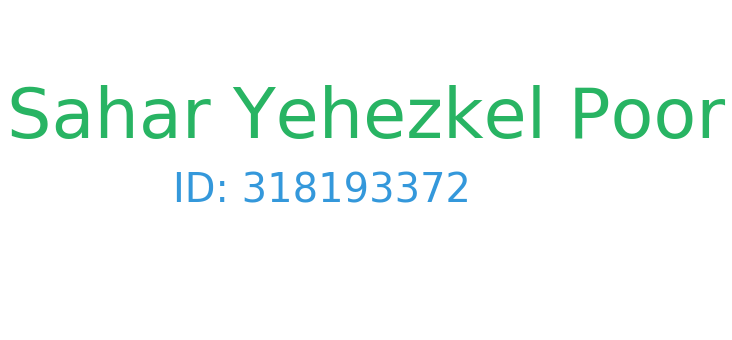

In [17]:
def plot_name_id(name, id):
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.text(0.6, 0.6, name, fontsize=70, color='#28B463', ha='center')
    ax.text(0.5, 0.4, f"ID: {id}", fontsize=40, color='#3498DB', ha='center')
    ax.axis('off')
    plt.show()

# Your name and ID
name = "Sahar Yehezkel Poor"
id = "318193372"

# Create the plot
plot_name_id(name, id)
